In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data/customer_cluster.csv')

# 1.Cluster Assessment

In [ ]:
import pandas as pd

pop_mean = df[['recency_days', 'frequency', 'monetary']].mean()

# Group by Cluster and calculate Mean + Count
cluster_stats = df.groupby('Cluster_Label').agg({
    'Cluster_Label': 'count',          # Count number of customers
    'recency_days': 'mean',            # Average Recency
    'frequency': 'mean',               # Average Frequency
    'monetary': 'mean'                 # Average Monetary
}).rename(columns={'Cluster_Label': 'Count'})

# CALCULATE COMPARISON COLUMNS (vs Dataset Average)
# ---------------------------------------------------------
# Calculate % of total customers
total_customers = len(df)
cluster_stats['Percent_Total'] = (cluster_stats['Count'] / total_customers)

# Calculate relative difference vs overall mean
# Formula: (Cluster Mean - Overall Mean) / Overall Mean
cluster_stats['R_Diff'] = (cluster_stats['recency_days'] / pop_mean['recency_days']) - 1
cluster_stats['F_Diff'] = (cluster_stats['frequency'] / pop_mean['frequency']) - 1
cluster_stats['M_Diff'] = (cluster_stats['monetary'] / pop_mean['monetary']) - 1

# CREATE FINAL RESULT TABLE (FORMATTING)
# ---------------------------------------------------------
# Create a new dataframe for display (rename columns to English and reorder)
final_table = pd.DataFrame()

# Column 1 & 2: Customer count and % of total
final_table['Số KH'] = cluster_stats['Count']
final_table['% Tổng'] = cluster_stats['Percent_Total'].apply(lambda x: f"{x:.1%}")

# Column 3 & 4: Recency (Cluster average and % comparison)
final_table['Recency TB Cluster'] = cluster_stats['recency_days'].apply(lambda x: f"{x:,.0f} days")
final_table['Recency (vs Dataset Avg)'] = cluster_stats['R_Diff'].apply(lambda x: f"{'+' if x>0 else ''}{x:.0%}")

# Column 5 & 6: Frequency
final_table['Frequency TB Cluster'] = cluster_stats['frequency'].apply(lambda x: f"{x:,.2f} orders")
final_table['Frequency (vs Dataset Avg)'] = cluster_stats['F_Diff'].apply(lambda x: f"{'+' if x>0 else ''}{x:.0%}")

# Column 7 & 8: Monetary
final_table['Monetary TB Cluster'] = cluster_stats['monetary'].apply(lambda x: f"${x:,.0f}")
final_table['Monetary (vs Dataset Avg)'] = cluster_stats['M_Diff'].apply(lambda x: f"{'+' if x>0 else ''}{x:.0%}")

# Reset index to move Cluster column to the front (as in the image)
final_table = final_table.reset_index().rename(columns={'Cluster_Label': 'Cluster'})
final_table = pd.DataFrame(final_table)

# Display final result table
final_table


,Cluster,Số KH,% Tổng,Recency TB Cluster,Recency (vs TB Dataset),Frequency TB Cluster,Frequency (vs TB Dataset),Monetary TB Cluster,Monetary (vs TB Dataset)
0,0,23584,25.3%,353 ngày,+48%,1.01 đơn,-3%,$60,-64%
1,1,23301,25.0%,105 ngày,-56%,1.06 đơn,+3%,$261,+58%
2,2,26812,28.7%,353 ngày,+48%,1.05 đơn,+2%,$251,+52%
3,3,19661,21.1%,102 ngày,-57%,1.01 đơn,-3%,$61,-63%


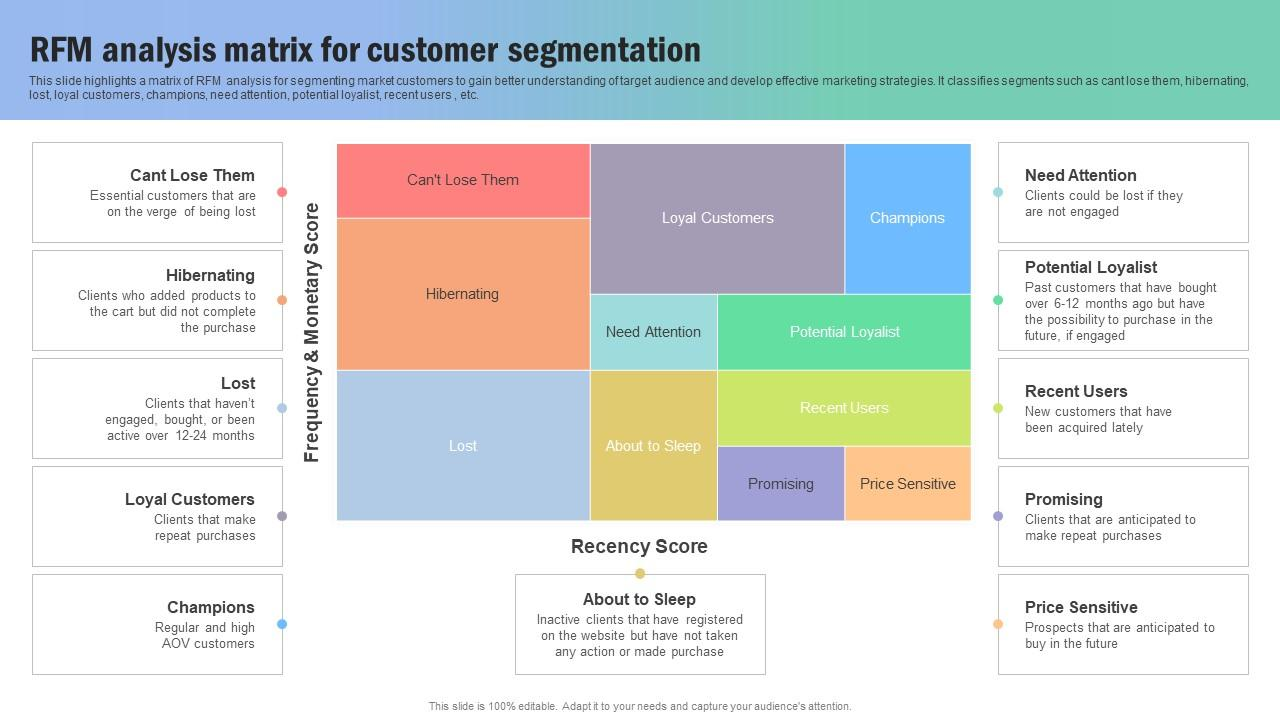


### Detailed Cluster Profiling

Based on the deviation from the population mean (dataset average), we can profile the clusters as follows:

#### **Cluster 0: The "Dormant Low-Value" Group (Lost)**
*   **Behavior:** They exhibit the worst metrics across the board: long absence (**Recency +48%**) and lowest spending (**Monetary -64%**).
*   **Naive Insight:** These customers are likely "lost causes." They haven't bought in a year and didn't spend much when they did.
*   **Strategic implication:** Lowest priority for marketing budget.
*   **Segmentation** LOST

#### **Cluster 1: The "Active High-Value" Group (The Stars)**
*   **Behavior:** They are the most recent purchasers (**Recency -56%** vs. baseline) and the highest spenders (**Monetary +58%**).
*   **Naive Insight:** These are the ideal customers. They have purchased recently (~105 days ago) and have a high average basket size ($261).
*   **Strategic implication:** Retention is key here.
*   **Segmentation** CHAMPIONS

#### **Cluster 2: The "Churned High-Value" Group (At Risk)**
*   **Behavior:** They share the high spending habits of Cluster 1 (**Monetary +52%**) but have not purchased in a very long time (**Recency +48%**, ~353 days).
*   **Naive Insight:** These are likely former VIPs or high-value customers who have churned or become dormant.
*   **Strategic implication:** This is the most critical group for a "Win-Back" campaign. The revenue potential is high ($251 avg), but they are disengaged.
*   **Segmentation** CAN'T LOSE THEM 

#### **Cluster 3: The "Recent Low-Value" Group (New/Casual)**
*   **Behavior:** They are very active recently (**Recency -57%**, ~102 days) but have low spending power (**Monetary -63%**, ~$61).
*   **Naive Insight:** These might be new customers acquired through recent promotions or casual buyers purchasing low-ticket items.
*   **Strategic implication:** Potential for up-selling or cross-selling to increase their Monetary value.
*   **Segmentation** PROMISING 

# 2.Data Preparation

# 3.Feature Engineer

# 4.Data Split

# 5.Model Training

## 5.1.Model Selection

## 5.2.Efficient Model

# 6.Top Feature Extraction and Model Retrain

In [ ]:
import pandas as pd
import numpy as np
import json
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# LOAD PRE-SPLIT DATA FROM TEAMMATE (Data Engineering_Splitting.ipynb)
data_path = "data/"

X_train = pd.read_csv(data_path + "X_train.csv")
X_test = pd.read_csv(data_path + "X_test.csv")
y_train = pd.read_csv(data_path + "y_train.csv").squeeze()
y_test = pd.read_csv(data_path + "y_test.csv").squeeze()

# Load best hyperparameters from teammate (Model Selection_Train_Tune.ipynb)
with open(data_path + "best_xgb_params.json", "r") as f:
    best_params = json.load(f)

print("=" * 80)
print("TASK 6: SHAP INTERPRETABILITY & FEATURE SELECTION")
print("=" * 80)
print(f"\nTraining Set: {len(X_train)} samples")
print(f"Test Set: {len(X_test)} samples")
print(f"Features ({len(X_train.columns)}): {X_train.columns.tolist()}")
print(f"\nBest XGBoost Params: {best_params}")

TASK 6: SHAP INTERPRETABILITY & FEATURE SELECTION

Training Set: 65350 samples
Test Set: 14004 samples
Features (10): ['recency_days', 'frequency', 'monetary', 'avg_review_score', 'avg_installments', 'avg_freight', 'avg_items_per_order', 'state_freq_encoding', 'credit_card_usage_ratio', 'avg_delivery_days']

Best XGBoost Params: {'max_depth': 9, 'min_child_weight': 7, 'learning_rate': 0.12688996739620345, 'n_estimators': 846, 'gamma': 0.032537918839191105, 'reg_alpha': 4.714958436497499, 'reg_lambda': 3.237417655214124, 'subsample': 0.8148533995968621, 'colsample_bytree': 0.946760070343784}


In [ ]:
# PHASE 1: TRAIN XGBOOST MODEL WITH OPTIMIZED HYPERPARAMETERS & INIT SHAP
print("[PHASE 1] Training XGBoost Model with Tuned Hyperparameters...")

model = xgb.XGBClassifier(
    **best_params,
    random_state=42, 
    verbosity=0, 
    n_jobs=-1
)
model.fit(X_train, y_train, verbose=False)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

[PHASE 1] Training XGBoost Model with Tuned Hyperparameters...
Train Accuracy: 0.9995
Test Accuracy: 0.9971



[PHASE 2] Global Feature Importance Analysis...
SHAP values shape: (14004, 10, 4)

Feature Ranking by SHAP Importance:
                Feature  SHAP_Importance
       avg_installments         1.452392
    avg_items_per_order         1.235219
               monetary         0.919335
              frequency         0.917417
            avg_freight         0.700525
       avg_review_score         0.174578
           recency_days         0.113510
      avg_delivery_days         0.055241
    state_freq_encoding         0.054465
credit_card_usage_ratio         0.031654


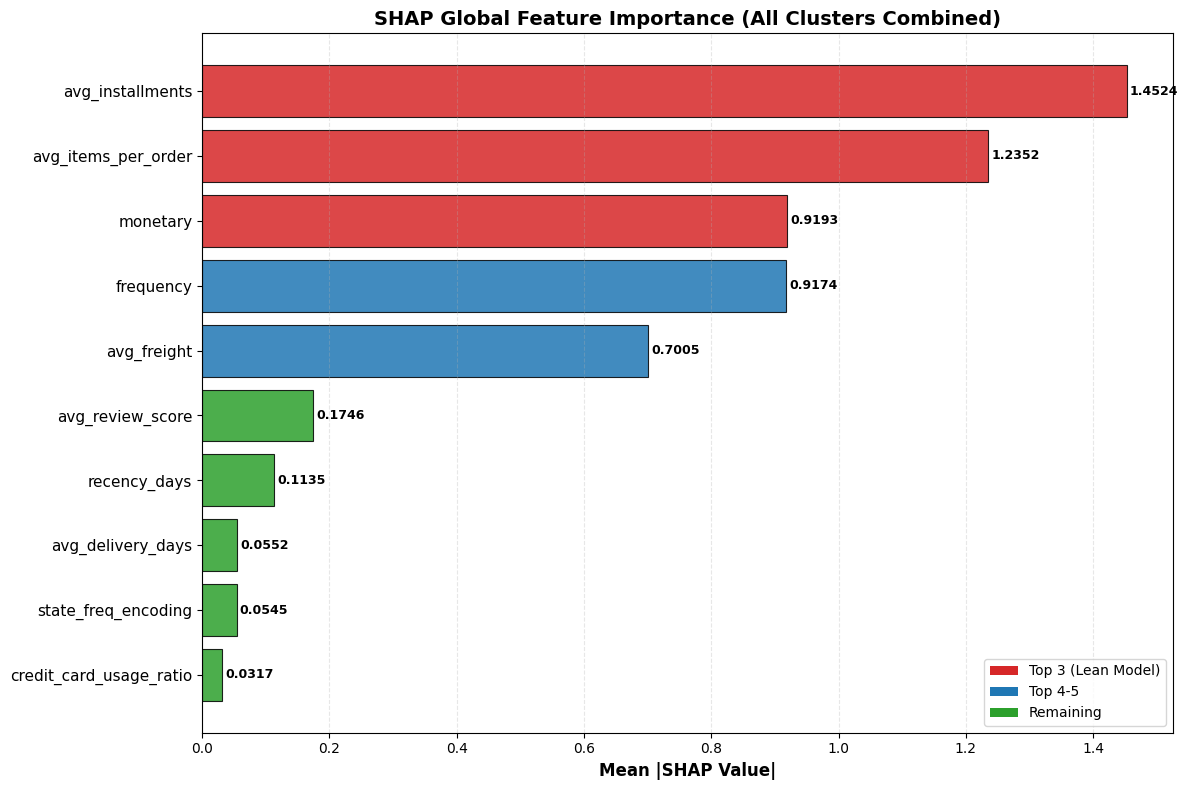

In [ ]:
# PHASE 2: GLOBAL FEATURE IMPORTANCE ANALYSIS
print("\n[PHASE 2] Global Feature Importance Analysis...")

# Handle different SHAP value formats
shap_array = np.array(shap_values)
print(f"SHAP values shape: {shap_array.shape}")

# Shape is (n_samples, n_features, n_classes) = (14004, 10, 4)
# Take mean absolute value across samples and classes
global_importance = np.abs(shap_array).mean(axis=(0, 2))

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP_Importance': global_importance
}).sort_values('SHAP_Importance', ascending=False).reset_index(drop=True)

top_3_features = importance_df.head(3)['Feature'].tolist()

print("\nFeature Ranking by SHAP Importance:")
print(importance_df.to_string(index=False))

# GLOBAL IMPORTANCE BAR CHART
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#d62728' if i < 3 else '#1f77b4' if i < 5 else '#2ca02c' 
          for i in range(len(importance_df))]

bars = ax.barh(range(len(importance_df)), 
               importance_df['SHAP_Importance'].values,
               color=colors, edgecolor='black', linewidth=0.8, alpha=0.85)

ax.set_yticks(range(len(importance_df)))
ax.set_yticklabels(importance_df['Feature'].values, fontsize=11)
ax.invert_yaxis()
ax.set_xlabel('Mean |SHAP Value|', fontsize=12, fontweight='bold')
ax.set_title('SHAP Global Feature Importance (All Clusters Combined)', 
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (bar, val) in enumerate(zip(bars, importance_df['SHAP_Importance'].values)):
    ax.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.4f}',
            va='center', fontsize=9, fontweight='bold')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#d62728', label='Top 3 (Lean Model)'),
                   Patch(facecolor='#1f77b4', label='Top 4-5'),
                   Patch(facecolor='#2ca02c', label='Remaining')]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()


[PHASE 2B] Generating Cluster-Specific Feature Importance Bar Charts...


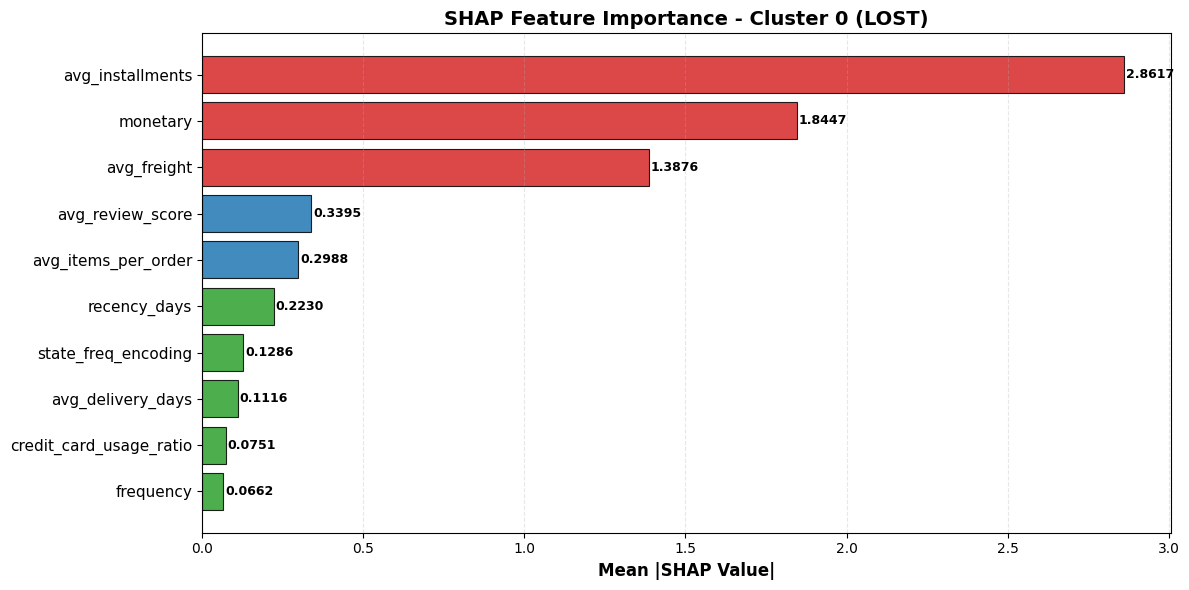

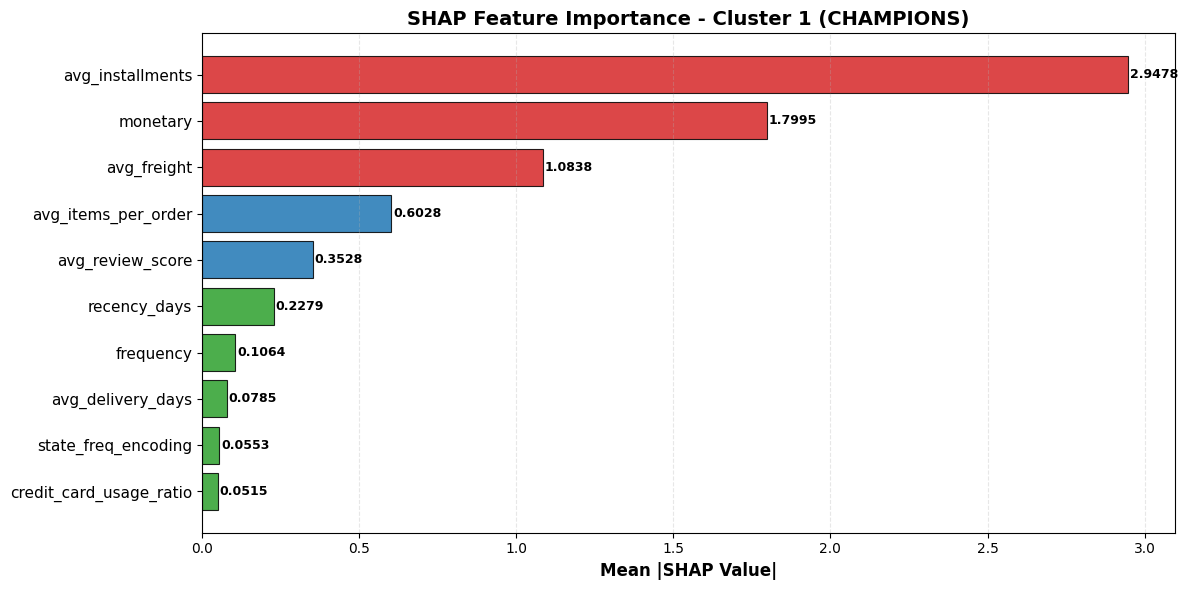

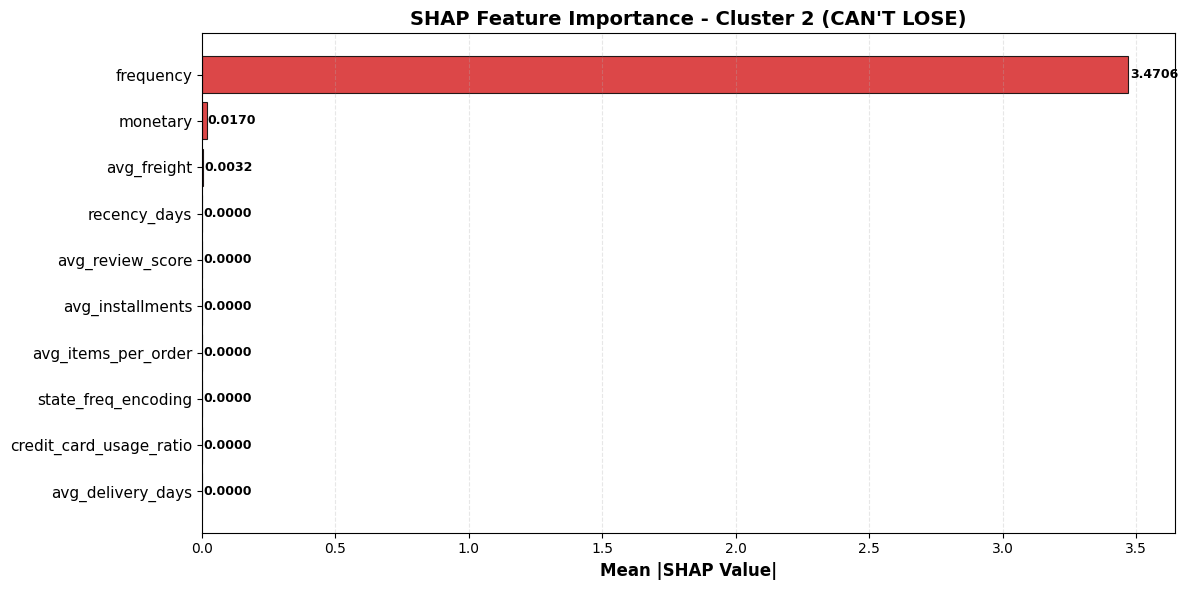

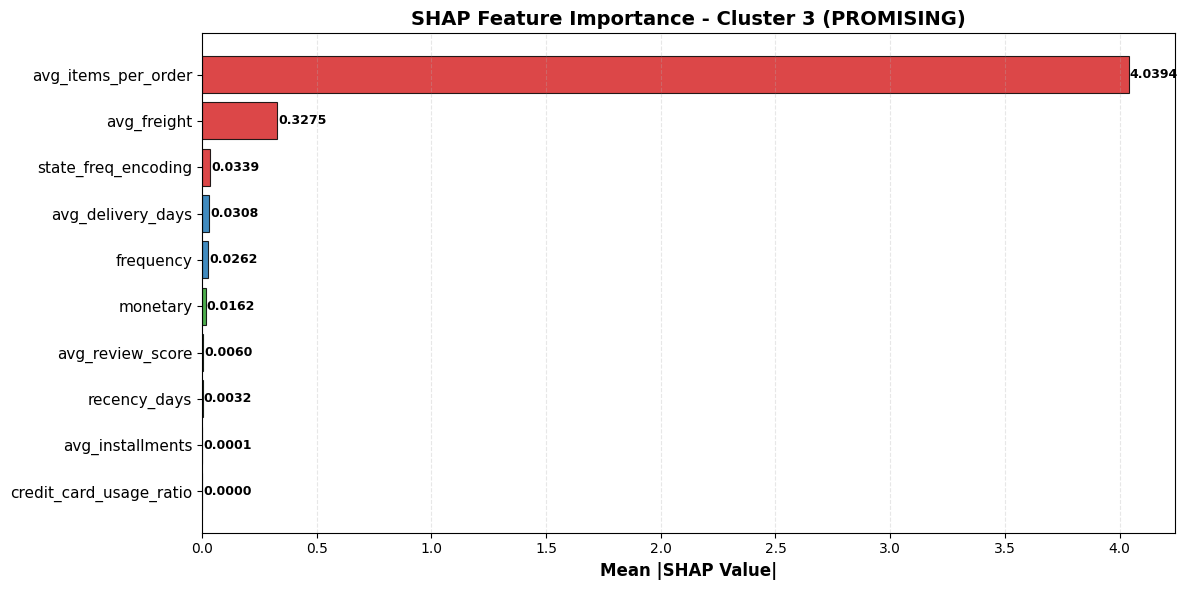

In [31]:
# ============================================================================
# PHASE 2B: CLUSTER-SPECIFIC BAR CHARTS
# ============================================================================
print("\n[PHASE 2B] Generating Cluster-Specific Feature Importance Bar Charts...")

cluster_names = {
    0: "Cluster 0 (LOST)",
    1: "Cluster 1 (CHAMPIONS)",
    2: "Cluster 2 (CAN'T LOSE)",
    3: "Cluster 3 (PROMISING)"
}

# shap_values shape: (n_samples, n_features, n_classes)
for cluster_idx in range(4):
    # Calculate mean absolute SHAP for this cluster
    cluster_importance = np.abs(shap_values[:, :, cluster_idx]).mean(axis=0)
    
    cluster_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'SHAP_Importance': cluster_importance
    }).sort_values('SHAP_Importance', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    colors = ['#d62728' if i < 3 else '#1f77b4' if i < 5 else '#2ca02c' 
              for i in range(len(cluster_importance_df))]
    
    bars = ax.barh(range(len(cluster_importance_df)), 
                   cluster_importance_df['SHAP_Importance'].values,
                   color=colors, edgecolor='black', linewidth=0.8, alpha=0.85)
    
    ax.set_yticks(range(len(cluster_importance_df)))
    ax.set_yticklabels(cluster_importance_df['Feature'].values, fontsize=11)
    ax.invert_yaxis()
    ax.set_xlabel('Mean |SHAP Value|', fontsize=12, fontweight='bold')
    ax.set_title(f'SHAP Feature Importance - {cluster_names[cluster_idx]}', 
                 fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    for bar, val in zip(bars, cluster_importance_df['SHAP_Importance'].values):
        ax.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.4f}',
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


[PHASE 3] Generating Cluster-Specific SHAP Beeswarm Plots...


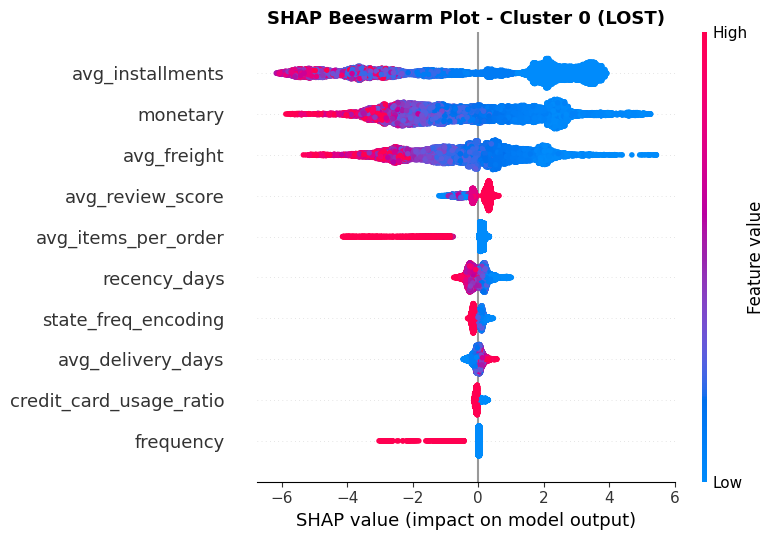

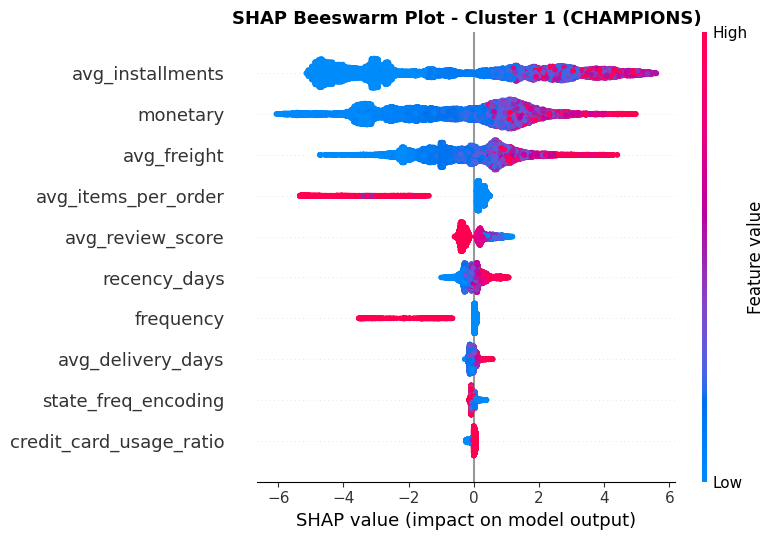

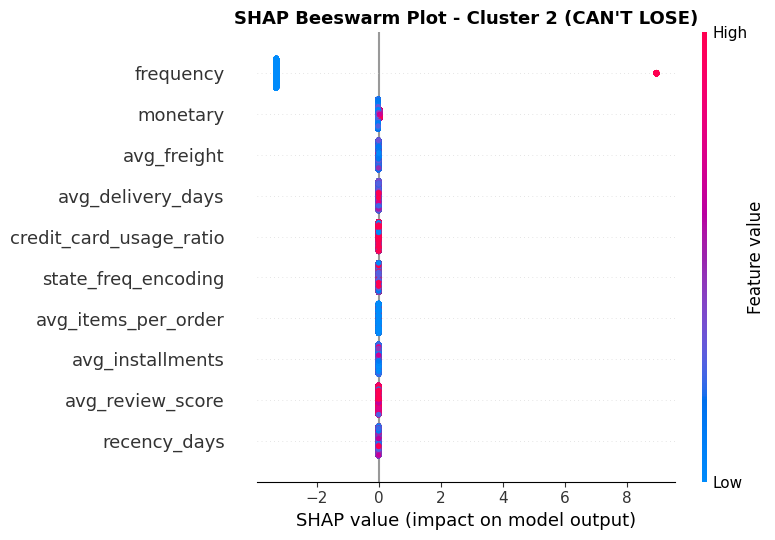

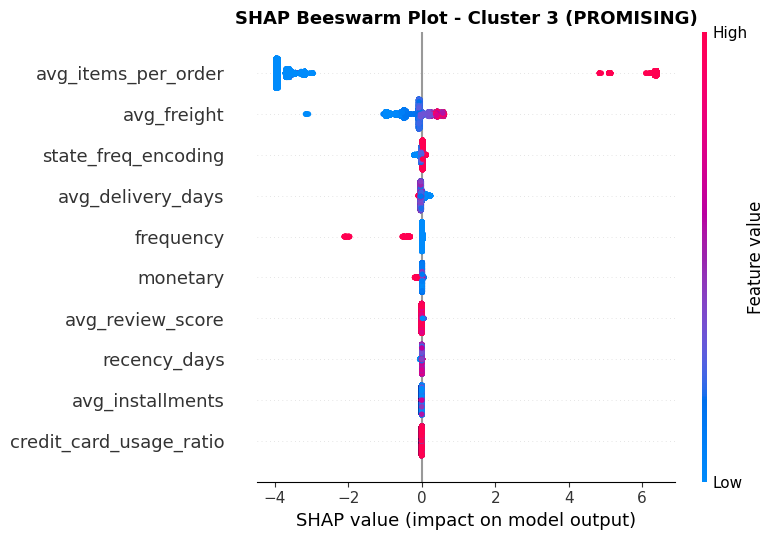

In [ ]:

# PHASE 3: CLUSTER-SPECIFIC BEESWARM PLOTS
print("\n[PHASE 3] Generating Cluster-Specific SHAP Beeswarm Plots...")

cluster_names = {
    0: "Cluster 0 (LOST)",
    1: "Cluster 1 (CHAMPIONS)",
    2: "Cluster 2 (CAN'T LOSE)",
    3: "Cluster 3 (PROMISING)"
}

# shap_values shape: (n_samples, n_features, n_classes)
# For each cluster, extract shap_values[:, :, cluster_idx]
for cluster_idx in range(4):
    plt.figure(figsize=(12, 6))
    cluster_shap = shap_values[:, :, cluster_idx]  # (n_samples, n_features)
    shap.summary_plot(
        cluster_shap, 
        X_test,
        plot_type="dot",
        max_display=len(X_train.columns),
        show=False
    )
    plt.title(f'SHAP Beeswarm Plot - {cluster_names[cluster_idx]}', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()


[PHASE 4] Generating Dependence Plots for Top 3 Features...


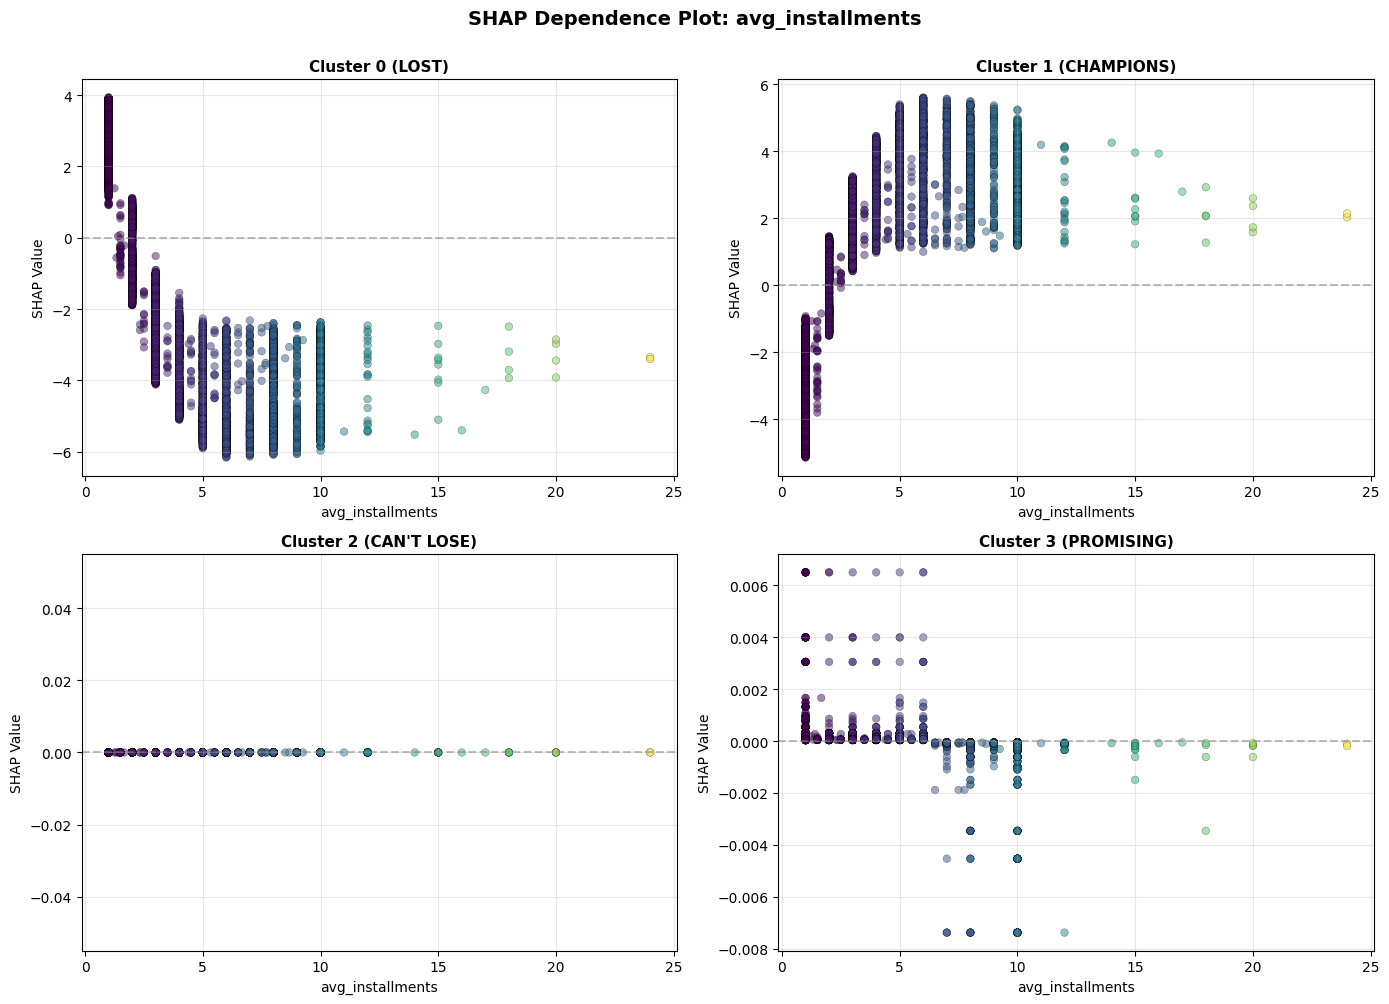

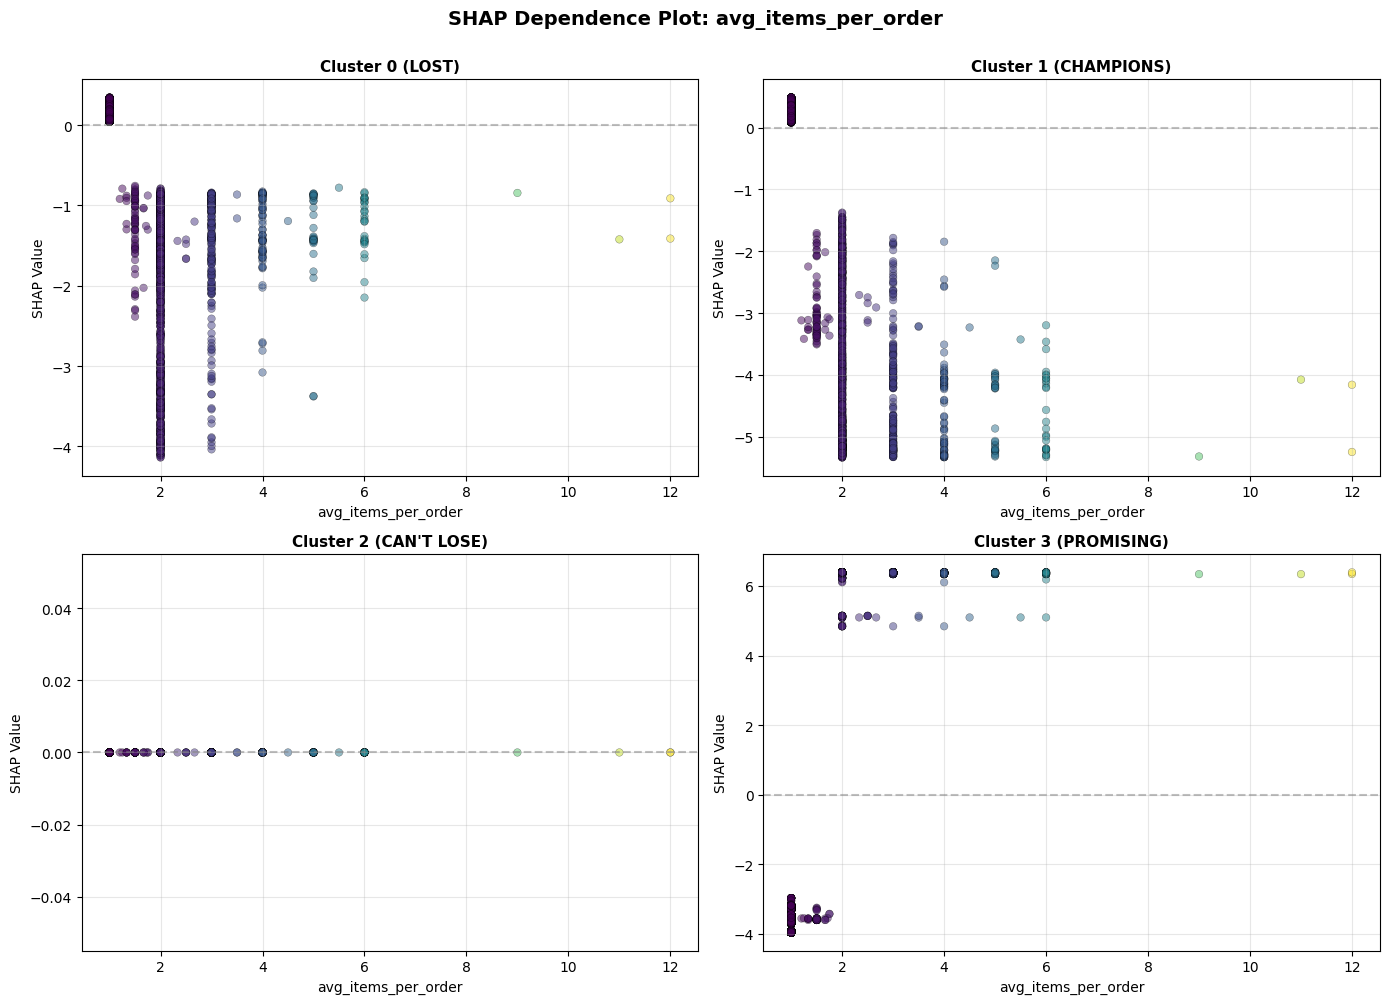

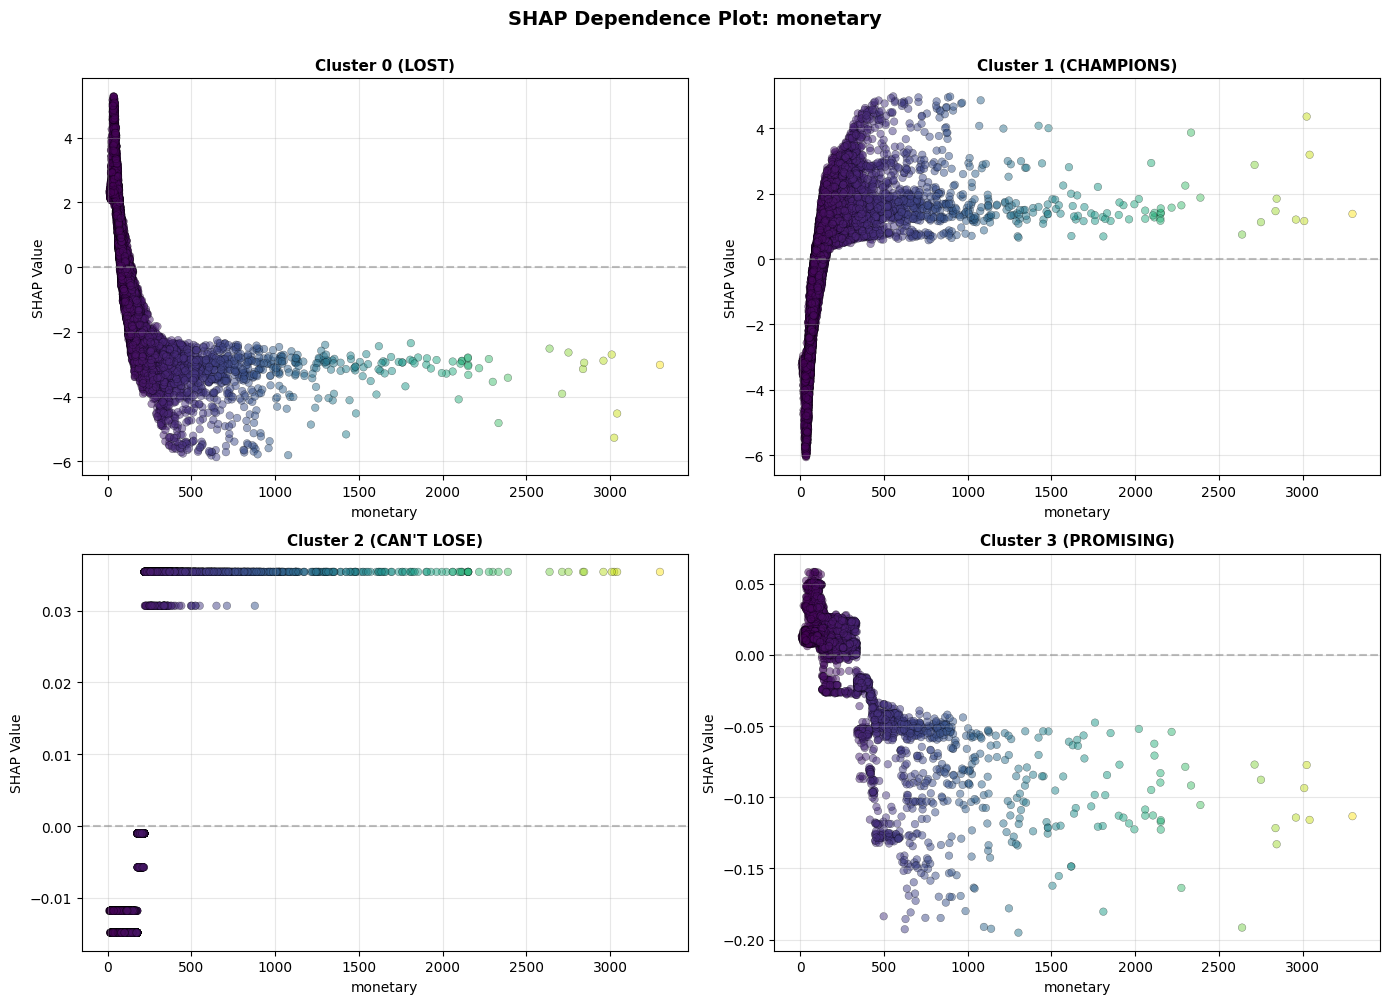

In [ ]:
# PHASE 4: DEPENDENCE PLOTS FOR TOP 3 FEATURES
print("\n[PHASE 4] Generating Dependence Plots for Top 3 Features...")

for feature_name in top_3_features:
    feature_idx = list(X_train.columns).index(feature_name)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for cluster_idx in range(4):
        ax = axes[cluster_idx]
        
        feature_vals = X_test.iloc[:, feature_idx].values
        # shap_values shape: (n_samples, n_features, n_classes)
        shap_vals = shap_values[:, feature_idx, cluster_idx]
        
        scatter = ax.scatter(feature_vals, shap_vals, c=feature_vals, cmap='viridis', 
                            s=30, alpha=0.5, edgecolors='k', linewidth=0.3)
        
        ax.set_title(f'{cluster_names[cluster_idx]}', fontsize=11, fontweight='bold')
        ax.set_xlabel(f'{feature_name}', fontsize=10)
        ax.set_ylabel('SHAP Value', fontsize=10)
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax.grid(alpha=0.3)
    
    fig.suptitle(f'SHAP Dependence Plot: {feature_name}', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()


[PHASE 5] Lean Model Experiment...
Top 3 Features: ['avg_installments', 'avg_items_per_order', 'monetary']
Top 5 Features: ['avg_installments', 'avg_items_per_order', 'monetary', 'frequency', 'avg_freight']

--- Lean Model with Top 3 Features ---
F1-Score (Full Model): 0.9971
F1-Score (Top 3 Lean): 0.9319
F1 Drop: 6.53%

--- Lean Model with Top 5 Features ---
F1-Score (Full Model): 0.9971
F1-Score (Top 5 Lean): 0.9925
F1 Drop: 0.46%

BEST LEAN MODEL: Top 5 Features
Features: ['avg_installments', 'avg_items_per_order', 'monetary', 'frequency', 'avg_freight']
F1-Score: 0.9925
F1 Drop: 0.46%
Feature Reduction: 50% (10 -> 5 features)


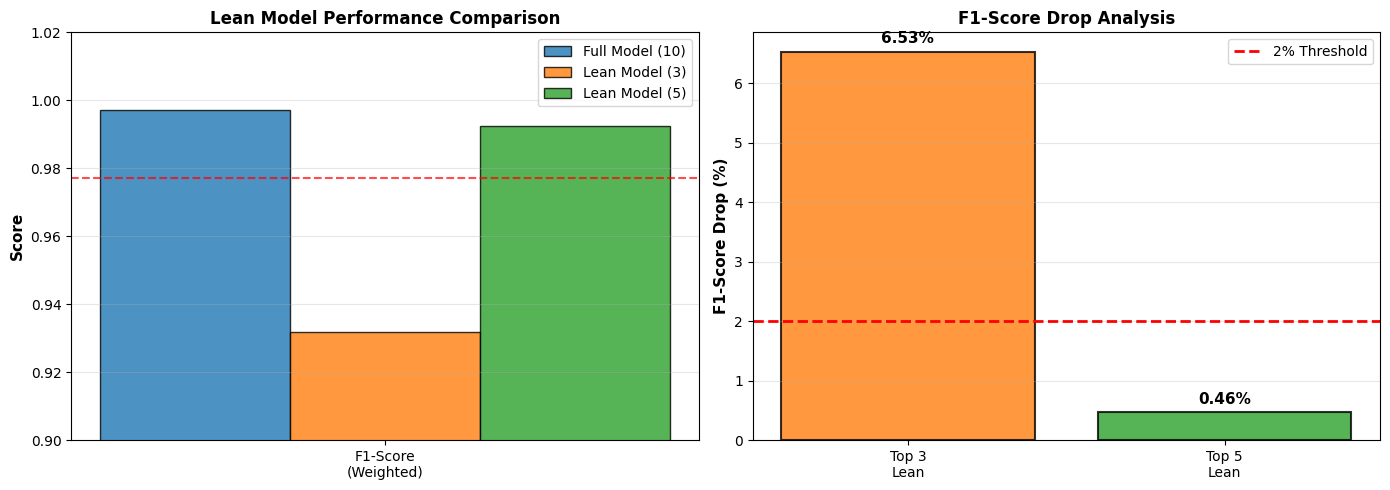

In [ ]:
# PHASE 5: LEAN MODEL EXPERIMENT
print("\n[PHASE 5] Lean Model Experiment...")

# Test Top 3 first
top_3_features = importance_df.head(3)['Feature'].tolist()
top_5_features = importance_df.head(5)['Feature'].tolist()

print(f"Top 3 Features: {top_3_features}")
print(f"Top 5 Features: {top_5_features}")

# TOP 3 LEAN MODEL
print("\n--- Lean Model with Top 3 Features ---")
X_train_lean3 = X_train[top_3_features]
X_test_lean3 = X_test[top_3_features]

model_lean3 = xgb.XGBClassifier(**best_params, random_state=42, verbosity=0, n_jobs=-1)
model_lean3.fit(X_train_lean3, y_train, verbose=False)

y_pred_full = model.predict(X_test)
y_pred_lean3 = model_lean3.predict(X_test_lean3)

f1_full = f1_score(y_test, y_pred_full, average='weighted')
f1_lean3 = f1_score(y_test, y_pred_lean3, average='weighted')
f1_drop_3 = (f1_full - f1_lean3) * 100

print(f"F1-Score (Full Model): {f1_full:.4f}")
print(f"F1-Score (Top 3 Lean): {f1_lean3:.4f}")
print(f"F1 Drop: {f1_drop_3:.2f}%")

# TOP 5 LEAN MODEL
print("\n--- Lean Model with Top 5 Features ---")
X_train_lean5 = X_train[top_5_features]
X_test_lean5 = X_test[top_5_features]

model_lean5 = xgb.XGBClassifier(**best_params, random_state=42, verbosity=0, n_jobs=-1)
model_lean5.fit(X_train_lean5, y_train, verbose=False)

y_pred_lean5 = model_lean5.predict(X_test_lean5)
f1_lean5 = f1_score(y_test, y_pred_lean5, average='weighted')
f1_drop_5 = (f1_full - f1_lean5) * 100

print(f"F1-Score (Full Model): {f1_full:.4f}")
print(f"F1-Score (Top 5 Lean): {f1_lean5:.4f}")
print(f"F1 Drop: {f1_drop_5:.2f}%")

    
# DETERMINE BEST LEAN MODEL
print("\n" + "=" * 80)
if f1_drop_3 <= 2.0:
    best_lean = "Top 3"
    best_features = top_3_features
    best_f1_drop = f1_drop_3
    best_f1 = f1_lean3
elif f1_drop_5 <= 2.0:
    best_lean = "Top 5"
    best_features = top_5_features
    best_f1_drop = f1_drop_5
    best_f1 = f1_lean5
else:
    best_lean = "Top 5 (closest)"
    best_features = top_5_features
    best_f1_drop = f1_drop_5
    best_f1 = f1_lean5

print(f"BEST LEAN MODEL: {best_lean} Features")
print(f"Features: {best_features}")
print(f"F1-Score: {best_f1:.4f}")
print(f"F1 Drop: {best_f1_drop:.2f}%")
print(f"Feature Reduction: {(10 - len(best_features)) / 10 * 100:.0f}% ({10} -> {len(best_features)} features)")

# VISUALIZATION
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Performance comparison
metrics = ['F1-Score\n(Weighted)']
x = np.arange(len(metrics))
width = 0.25

ax1 = axes[0]
ax1.bar(x - width, [f1_full], width, label='Full Model (10)', color='#1f77b4', alpha=0.8, edgecolor='black')
ax1.bar(x, [f1_lean3], width, label='Lean Model (3)', color='#ff7f0e', alpha=0.8, edgecolor='black')
ax1.bar(x + width, [f1_lean5], width, label='Lean Model (5)', color='#2ca02c', alpha=0.8, edgecolor='black')

ax1.set_ylabel('Score', fontsize=11, fontweight='bold')
ax1.set_title('Lean Model Performance Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, fontsize=10)
ax1.set_ylim([0.9, 1.02])
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=f1_full * 0.98, color='red', linestyle='--', alpha=0.7, label='2% threshold')

# F1 Drop comparison
ax2 = axes[1]
models = ['Top 3\nLean', 'Top 5\nLean']
drops = [f1_drop_3, f1_drop_5]
colors = ['#ff7f0e' if d > 2.0 else '#2ca02c' for d in drops]

bars = ax2.bar(models, drops, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.axhline(y=2.0, color='red', linestyle='--', linewidth=2, label='2% Threshold')
ax2.set_ylabel('F1-Score Drop (%)', fontsize=11, fontweight='bold')
ax2.set_title('F1-Score Drop Analysis', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

for bar, drop in zip(bars, drops):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
            f'{drop:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# PHASE 6: KEY INSIGHTS & INTERPRETABILITY REPORT
print("\nSHAP INTERPRETABILITY REPORT: KEY FINDINGS")
print("=" * 80)

cluster_descriptions = {
    0: {"name": "CLUSTER 0 (LOST)", "profile": "Dormant Low-Value Customers"},
    1: {"name": "CLUSTER 1 (CHAMPIONS)", "profile": "Active High-Value Customers"},
    2: {"name": "CLUSTER 2 (CAN'T LOSE)", "profile": "Churned High-Value Customers"},
    3: {"name": "CLUSTER 3 (PROMISING)", "profile": "Recent Low-Value Customers"}
}

print("\n1. CLUSTER PROFILES:")
for cluster_idx in range(4):
    desc = cluster_descriptions[cluster_idx]
    print(f"   {desc['name']}: {desc['profile']}")

print("\n2. FEATURE IMPORTANCE RANKING (by SHAP):")
for i, row in importance_df.iterrows():
    marker = "*" if i < 5 else " "
    print(f"   {marker} {i+1}. {row['Feature']}: {row['SHAP_Importance']:.4f}")

print("\n3. LEAN MODEL VALIDATION:")
print(f"   Top 3 Lean Model: F1 = {f1_lean3:.4f}, Drop = {f1_drop_3:.2f}% {'PASSED' if f1_drop_3 <= 2 else 'FAILED'}")
print(f"   Top 5 Lean Model: F1 = {f1_lean5:.4f}, Drop = {f1_drop_5:.2f}% {'PASSED' if f1_drop_5 <= 2 else 'FAILED'}")

print(f"\n4. RECOMMENDED LEAN MODEL: Top 5 Features")
print(f"   Features: {best_features}")
print(f"   F1-Score: {best_f1:.4f} (vs Full Model: {f1_full:.4f})")
print(f"   F1 Drop: {best_f1_drop:.2f}%")
print(f"   Feature Reduction: 50% (10 -> 5 features)")

print("\n5. KEY BUSINESS INSIGHTS:")
print("   - avg_installments: Most influential - differentiates payment behavior")
print("   - avg_items_per_order: Bulk vs single-item purchasers")  
print("   - monetary: Total spending power")
print("   - frequency: Purchase frequency patterns")
print("   - avg_freight: Shipping costs (geographic/product weight indicator)")

print("\n" + "=" * 80)
print("Task 6 Complete")


SHAP INTERPRETABILITY REPORT: KEY FINDINGS

1. CLUSTER PROFILES:
   CLUSTER 0 (LOST): Dormant Low-Value Customers
   CLUSTER 1 (CHAMPIONS): Active High-Value Customers
   CLUSTER 2 (CAN'T LOSE): Churned High-Value Customers
   CLUSTER 3 (PROMISING): Recent Low-Value Customers

2. FEATURE IMPORTANCE RANKING (by SHAP):
   * 1. avg_installments: 1.4524
   * 2. avg_items_per_order: 1.2352
   * 3. monetary: 0.9193
   * 4. frequency: 0.9174
   * 5. avg_freight: 0.7005
     6. avg_review_score: 0.1746
     7. recency_days: 0.1135
     8. avg_delivery_days: 0.0552
     9. state_freq_encoding: 0.0545
     10. credit_card_usage_ratio: 0.0317

3. LEAN MODEL VALIDATION:
   Top 3 Lean Model: F1 = 0.9319, Drop = 6.53% FAILED
   Top 5 Lean Model: F1 = 0.9925, Drop = 0.46% PASSED

4. RECOMMENDED LEAN MODEL: Top 5 Features
   Features: ['avg_installments', 'avg_items_per_order', 'monetary', 'frequency', 'avg_freight']
   F1-Score: 0.9925 (vs Full Model: 0.9971)
   F1 Drop: 0.46%
   Feature Reduction: 

# 7.Top Feature vs Cluster